### Description

This notebook contains strategies derived from the book "Buy The Fear, Sell The Greed" by Larry Connors.

https://www.amazon.in/Buy-Fear-Sell-Greed-Behavioral/dp/0578206501


### Libraries and Data

In [1]:
import pandas as pd
import talib
import vectorbt as vbt
import yfinance as yf

In [2]:
crypto_data = pd.read_csv('../binance_futures_close_1d.csv').set_index('Open time').shift()
crypto_data.tail()


,BTCUSDT,ETHUSDT,BNBUSDT,BCCUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,...,RENDERUSDT,TONUSDT,DOGSUSDT,EURIUSDT,SLFUSDT,POLUSDT,NEIROUSDT,TURBOUSDT,1MBABYDOGEUSDT,CATIUSDT
Open time,,,,,,,,,,,,,,,,,,,,,
2024-09-19 00:00:00+00:00,61759.99,2374.75,559.5,NaN,9.54,64.84,2.309,0.3441,0.5852,0.4903,...,4.989,5.641,0.000963,1.1109,0.4064,0.3902,0.000963,0.005338,0.002271,NaN
2024-09-20 00:00:00+00:00,62947.99,2465.21,567.0,NaN,9.75,65.40,2.410,0.3510,0.5868,0.5085,...,5.130,5.683,0.000978,1.1160,0.4162,0.3991,0.000917,0.006265,0.002315,NaN
2024-09-21 00:00:00+00:00,63201.05,2561.40,569.0,NaN,10.11,65.33,2.455,0.3522,0.5851,0.5174,...,5.282,5.585,0.000939,1.1157,0.4100,0.4014,0.000838,0.005952,0.001987,0.9112
2024-09-22 00:00:00+00:00,63348.96,2612.40,588.6,NaN,10.44,66.84,2.544,0.3584,0.5976,0.5278,...,5.604,5.673,0.000944,1.1153,0.4178,0.4115,0.000810,0.006078,0.001955,0.9036
2024-09-23 00:00:00+00:00,63578.76,2581.00,588.7,NaN,10.08,68.68,2.475,0.3517,0.5871,0.5176,...,5.629,5.620,0.000834,1.1154,0.5258,0.4010,0.000829,0.005561,0.001834,0.7628


### RSI PowerZones

[*********************100%%**********************]  1 of 1 completed


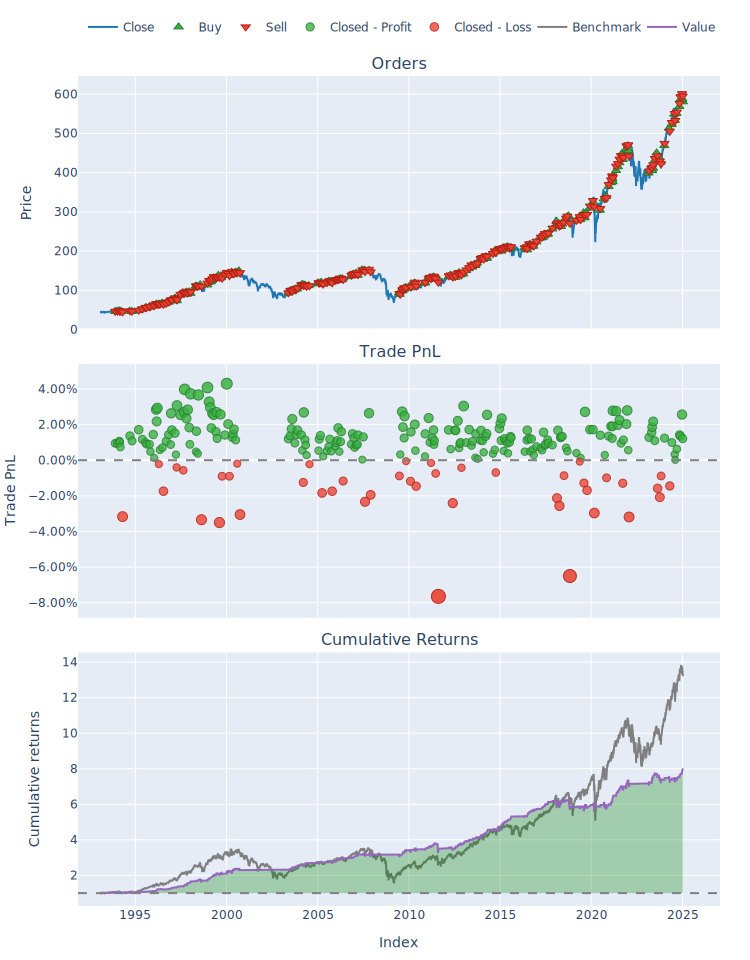

In [3]:
# Loading SPY data
spy_data = yf.download('SPY', interval='1d', period='max')
close = spy_data['Close']

# Computing indicators
sma200 = close.rolling(200).mean().shift(1)
rsi4 = talib.RSI(close, 4)

# Generating signals
entries = (close > sma200) & (rsi4.vbt.crossed_below(30) | rsi4.vbt.crossed_below(25))
exits = rsi4.vbt.crossed_above(55)

# Run backtest
pf = vbt.Portfolio.from_signals(close, entries, exits)

# Plotting results
pf.plot().show_svg()